# Compare Messari and Convex Community Subgraph Outputs

TODO:
1. The subgraph data is really different. Need a "source of truth" to determine what is "correct"

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datafetcher import DataFetcher
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

## UST Wormhole pool during Luna Collapse

In [3]:
pool_name = "3pool"
datafetcher = DataFetcher('2023-03-01', '2023-04-01')

# Pool Data

In [4]:
# NOTE: Seems like Convex community doesn't have an obvious query for pool reserves/composition
df_pool_messari = datafetcher.get_pool_data(pool_name, source="messari") # optionally save=True
df_pool_cvx = datafetcher.get_pool_data(pool_name, source="cvx")

In [5]:
df_pool_messari.head()

,symbol,name,totalValueLockedUSD,isSingleSided,block,DAI.weight,DAI.balance,USDC.weight,USDC.balance,USDT.weight,USDT.balance
datetime,,,,,,,,,,,
2023-03-01 00:00:11,3Crv,Curve.fi DAI/USDC/USDT,5.028032e+08,False,16730072,34.84313,1.793815e+08,36.38666,1.873280e+08,28.77021,1.481166e+08
2023-03-01 00:10:18,3Crv,Curve.fi DAI/USDC/USDT,5.028032e+08,False,16730122,34.84019,1.793664e+08,36.39056,1.873481e+08,28.76924,1.481116e+08
2023-03-01 00:20:25,3Crv,Curve.fi DAI/USDC/USDT,5.027785e+08,False,16730172,34.83609,1.793365e+08,36.39318,1.873524e+08,28.77073,1.481119e+08
2023-03-01 00:30:33,3Crv,Curve.fi DAI/USDC/USDT,5.027141e+08,False,16730222,34.81543,1.792072e+08,36.42968,1.875162e+08,28.75489,1.480115e+08
2023-03-01 00:40:40,3Crv,Curve.fi DAI/USDC/USDT,5.027027e+08,False,16730272,34.81622,1.792072e+08,36.43050,1.875162e+08,28.75327,1.479998e+08


In [6]:
df_pool_cvx.head()

,virtualPrice,symbol,poolType,name,metapool,lpToken,isV2,isRebasing,creationTx,creationDate,creationBlock,c128,basePool,baseApr,assetType,address,id,pool_id,block
datetime,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:11,1.02391,3Crv,REGISTRY_V1,Curve.fi DAI/USDC/USDT,False,0x6c3f90f043a72fa612cbac8115ee7e52bde6e490,False,False,0xd35be3c92c720ae39f99d6e46c9d315b24275f077aa0...,1604017072,11154878,False,0x0000000000000000000000000000000000000000,0,0,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16730072
2023-03-01 00:10:18,1.02391,3Crv,REGISTRY_V1,Curve.fi DAI/USDC/USDT,False,0x6c3f90f043a72fa612cbac8115ee7e52bde6e490,False,False,0xd35be3c92c720ae39f99d6e46c9d315b24275f077aa0...,1604017072,11154878,False,0x0000000000000000000000000000000000000000,0,0,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16730122
2023-03-01 00:20:25,1.02391,3Crv,REGISTRY_V1,Curve.fi DAI/USDC/USDT,False,0x6c3f90f043a72fa612cbac8115ee7e52bde6e490,False,False,0xd35be3c92c720ae39f99d6e46c9d315b24275f077aa0...,1604017072,11154878,False,0x0000000000000000000000000000000000000000,0,0,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16730172
2023-03-01 00:30:33,1.02391,3Crv,REGISTRY_V1,Curve.fi DAI/USDC/USDT,False,0x6c3f90f043a72fa612cbac8115ee7e52bde6e490,False,False,0xd35be3c92c720ae39f99d6e46c9d315b24275f077aa0...,1604017072,11154878,False,0x0000000000000000000000000000000000000000,0,0,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16730222
2023-03-01 00:40:40,1.02391,3Crv,REGISTRY_V1,Curve.fi DAI/USDC/USDT,False,0x6c3f90f043a72fa612cbac8115ee7e52bde6e490,False,False,0xd35be3c92c720ae39f99d6e46c9d315b24275f077aa0...,1604017072,11154878,False,0x0000000000000000000000000000000000000000,0,0,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7,16730272


# Swap Data

In [7]:
df_swaps_cvx = datafetcher.get_swaps_data(pool_name, source="cvx") # optionally save=True
df_swaps_messari = datafetcher.get_swaps_data(pool_name, source="messari") # optionally save=True

In [8]:
df_swaps_cvx.head()

,tokenIn.symbol,amountIn,amountInUSD,tokenOut.symbol,amountOut,amountOutUSD,from,hash
datetime,,,,,,,,
2023-03-01 00:07:23,USDC,5000.0,None,USDT,4998.88453,None,0x99a58482bd75cbab83b27ec03ca68ff489b5788f,0x7a952551d3ae81af31626e7b990972a07e21512cadf8...
2023-03-01 00:06:11,USDC,15090.0,None,DAI,15088.17969,None,0x4a14347083b80e5216ca31350a2d21702ac3650d,0x8b0774d994e0fc43564f86d7b703135bcc9a952e1d48...
2023-03-01 00:13:59,USDC,29950.0,None,DAI,29946.38519,None,0x4a14347083b80e5216ca31350a2d21702ac3650d,0x5002315a153c4830ee590d5a7c805d8f74b34a6befab...
2023-03-01 00:24:11,USDC,24200.0,None,DAI,24197.07516,None,0x4a14347083b80e5216ca31350a2d21702ac3650d,0x0698037f24414411f72199f4be1fb4cbe23915045508...
2023-03-01 00:26:35,USDC,99955.0,None,DAI,99942.88725,None,0x4a14347083b80e5216ca31350a2d21702ac3650d,0x3f3c851398828ba23e207c4d529038922b91fffa15fa...


In [9]:
df_swaps_messari.head()

,tokenIn.symbol,amountIn,amountInUSD,tokenOut.symbol,amountOut,amountOutUSD,from,hash
timestamp,,,,,,,,
2023-03-01 00:07:23,USDC,5000.0,5000.0,USDT,4998.88453,4998.88453,0x99a58482bd75cbab83b27ec03ca68ff489b5788f,0x7a952551d3ae81af31626e7b990972a07e21512cadf8...
2023-03-01 00:06:11,USDC,15090.0,15090.0,DAI,15088.17969,15088.17969,0x4a14347083b80e5216ca31350a2d21702ac3650d,0x8b0774d994e0fc43564f86d7b703135bcc9a952e1d48...
2023-03-01 00:13:59,USDC,29950.0,29950.0,DAI,29946.38519,29946.38519,0x4a14347083b80e5216ca31350a2d21702ac3650d,0x5002315a153c4830ee590d5a7c805d8f74b34a6befab...
2023-03-01 00:24:11,USDC,24200.0,24200.0,DAI,24197.07516,24197.07516,0x4a14347083b80e5216ca31350a2d21702ac3650d,0x0698037f24414411f72199f4be1fb4cbe23915045508...
2023-03-01 00:26:35,USDC,99955.0,99955.0,DAI,99942.88725,99942.88725,0x4a14347083b80e5216ca31350a2d21702ac3650d,0x3f3c851398828ba23e207c4d529038922b91fffa15fa...


In [10]:
tokens_messari = set(df_swaps_messari['tokenIn.symbol'].unique().tolist() + df_swaps_messari['tokenOut.symbol'].unique().tolist())
tokens_cvx = set(df_swaps_cvx['tokenIn.symbol'].unique().tolist() + df_swaps_cvx['tokenOut.symbol'].unique().tolist())
print(f"Same tokens? {tokens_messari == tokens_cvx}")
tokens_messari

Same tokens? True


{'DAI', 'USDC', 'USDT'}

In [11]:
# NOTE: Seems that Messari is missing some swaps (or Convex is double counting? probs not)
print(f"Swap Count\nMessari:{df_swaps_messari.shape[0]}\nConvex:{df_swaps_cvx.shape[0]}")

Swap Count
Messari:32710
Convex:35890


In [20]:
df_swaps_cvx[df_swaps_cvx['hash']=='0x1fe7d469d8bed522e1e05eae59b39add5a809c36f3e82fb2bf61269dc8d2f155']

,tokenIn.symbol,amountIn,amountInUSD,tokenOut.symbol,amountOut,amountOutUSD,from,hash
datetime,,,,,,,,
2023-03-11 05:03:59,USDC,94990.35626,None,USDT,89128.36106,None,0x0000000000a84d1a9b0063a910315c7ffa9cd248,0x1fe7d469d8bed522e1e05eae59b39add5a809c36f3e8...


In [17]:
missing_in_messari

{'0x1fe7d469d8bed522e1e05eae59b39add5a809c36f3e82fb2bf61269dc8d2f155',
 '0x0e7181aba09444ff705591e7d3beb7580b57f388c627ab2bd6ed4e42898ed2cf',
 '0x39cec0b098dc3b5bd3efb7ce64a3de7ce1dd813abc7381efde59e9f85942e9bb',
 '0x3937bbe65ee0d8bda5fe409c2361f90de4b1f5bb23391e8d8a903ec8867e2a66',
 '0x635ab9cd01bf1f0f5276dfb187d7ea8837841cdf5a5330e60b140520b8cbe588',
 '0x4b372baeb7c5abed6c2c031aa404b3d2a7e5bd1ede5a6ac364dbf733a7460c42',
 '0xce3a2218f3bcff90a179ea15812e0f52538e3c6e1721b68f1b16267f01b17342',
 '0xded8c130c816019705dc20f3491cee95128ca438f90e2305b5e3b9a9f0e85687',
 '0x3f8b5385e3f892aa61acf75b95b76ae80315c5636f7a18f8fe9b91b413c556b9',
 '0xda0d8336edf21013dab236e3d08901eeabe84cbd439dbbe2239feaa50d92f995',
 '0x44f16323a1b998498541cf81e3ad08477dec26d529771fb794d05c97994ca966',
 '0xe452d910b05cc0d48238d3632aa0521cc31850a132ebee030840b6d3a3b8ed54',
 '0xb34eca03b0e46d4ee28975891af606e26b479dc16aafdac462cd3cfd3e1d8938',
 '0xafac9b1d39624856e886b6cc1f39f75163d92cdfa715b1bf3cdeb5eea6d9c84e',
 '0xaf

In [21]:
df_swaps_cvx[df_swaps_cvx['hash']=='0xf748ed2dd5ecdd947a8b68dc7e3055f248c9b603e466f59278f0755d3c255886']

,tokenIn.symbol,amountIn,amountInUSD,tokenOut.symbol,amountOut,amountOutUSD,from,hash
datetime,,,,,,,,


In [22]:
missing_in_cvx

{'0xf748ed2dd5ecdd947a8b68dc7e3055f248c9b603e466f59278f0755d3c255886',
 '0xde96583e9564e8124961a38308ea5e8ed6bf3ea4795a07c6bf082beb718b17db',
 '0xe594e5ee83ba6bb972ed7b4eedce47bd076752d50a2ad1322dd8f616b509f667',
 '0xa1f0d6c36282d457da4cb46f139f7584c888e21190ff8ee7d56972078ced4a28',
 '0xc38f8513bd36cce3faeddc6970887f002bb3025a547c741ff69c7523e4a26359',
 '0xfba738a9531b576cdcca783f82e05593eae71411ddee5f812a4a45d0b21b45b0',
 '0xc8c706107874a1a44f944b968f5e99bf060929ddd3ce64be319f6026f4e86f70',
 '0xccbad5671ff534923057b69e65c929bae8c217221abcfeedcf4fd8556e48efb5',
 '0xcd4a1de6a427b7658cc43172fc8ef744bba23ee7379b6dec8f0aaf9a50a87cc2',
 '0xa863c7647a66911682329533cc76e7c84fc31d704044fcdc390c5a859ce6ce8e',
 '0xf99425f1a7bab1bbf717b2900621954f1be77b7e700d1be857026541c8a1bee3',
 '0xe178c2ef32beb718704b54b25c9ddf01ea34f405edd7f4c6770ebf68e017b261',
 '0xc62432be9d3cf25cf4a7018bd7ee1c7229e18984543cb68b58606e725586ba75',
 '0xf07addc92073ea848b23c93bb436a1a8cecc0c76f2c870ab44fbcde54669779f',
 '0x95

In [23]:
df_swaps_messari[df_swaps_messari['hash']=='0xf748ed2dd5ecdd947a8b68dc7e3055f248c9b603e466f59278f0755d3c255886']

,tokenIn.symbol,amountIn,amountInUSD,tokenOut.symbol,amountOut,amountOutUSD,from,hash
timestamp,,,,,,,,
2023-03-12 22:55:11,USDC,20457.0,20457.0,USDT,20114.81163,20114.81163,0x7122db0ebe4eb9b434a9f2ffe6760bc03bfbd0e0,0xf748ed2dd5ecdd947a8b68dc7e3055f248c9b603e466...


In [12]:
missing_in_cvx = set(df_swaps_messari["hash"]) - set(df_swaps_cvx["hash"])
missing_in_messari = set(df_swaps_cvx["hash"]) - set(df_swaps_messari["hash"])

print(f"Missing in cvx: {len(missing_in_cvx)}, Missing in messari: {len(missing_in_messari)}")

Missing in cvx: 1087, Missing in messari: 4061


In [13]:
print(f"Swap hash Count\nMessari:{df_swaps_messari['hash'].unique().shape[0]}\nConvex:{df_swaps_cvx['hash'].unique().shape[0]}")

Swap hash Count
Messari:32710
Convex:35684


In [149]:
print(f"Amount In Sum\nMessari:{df_swaps_messari['amountIn'].sum()}\nConvex:{df_swaps_cvx['amountIn'].sum()}")
print(f"Amount Out Sum\nMessari:{df_swaps_messari['amountOut'].sum()}\nConvex:{df_swaps_cvx['amountOut'].sum()}")

Amount In Sum
Messari:5966758886.4561
Convex:6646921227.33356
Amount Out Sum
Messari:5966506109.375509
Convex:6646537795.05013


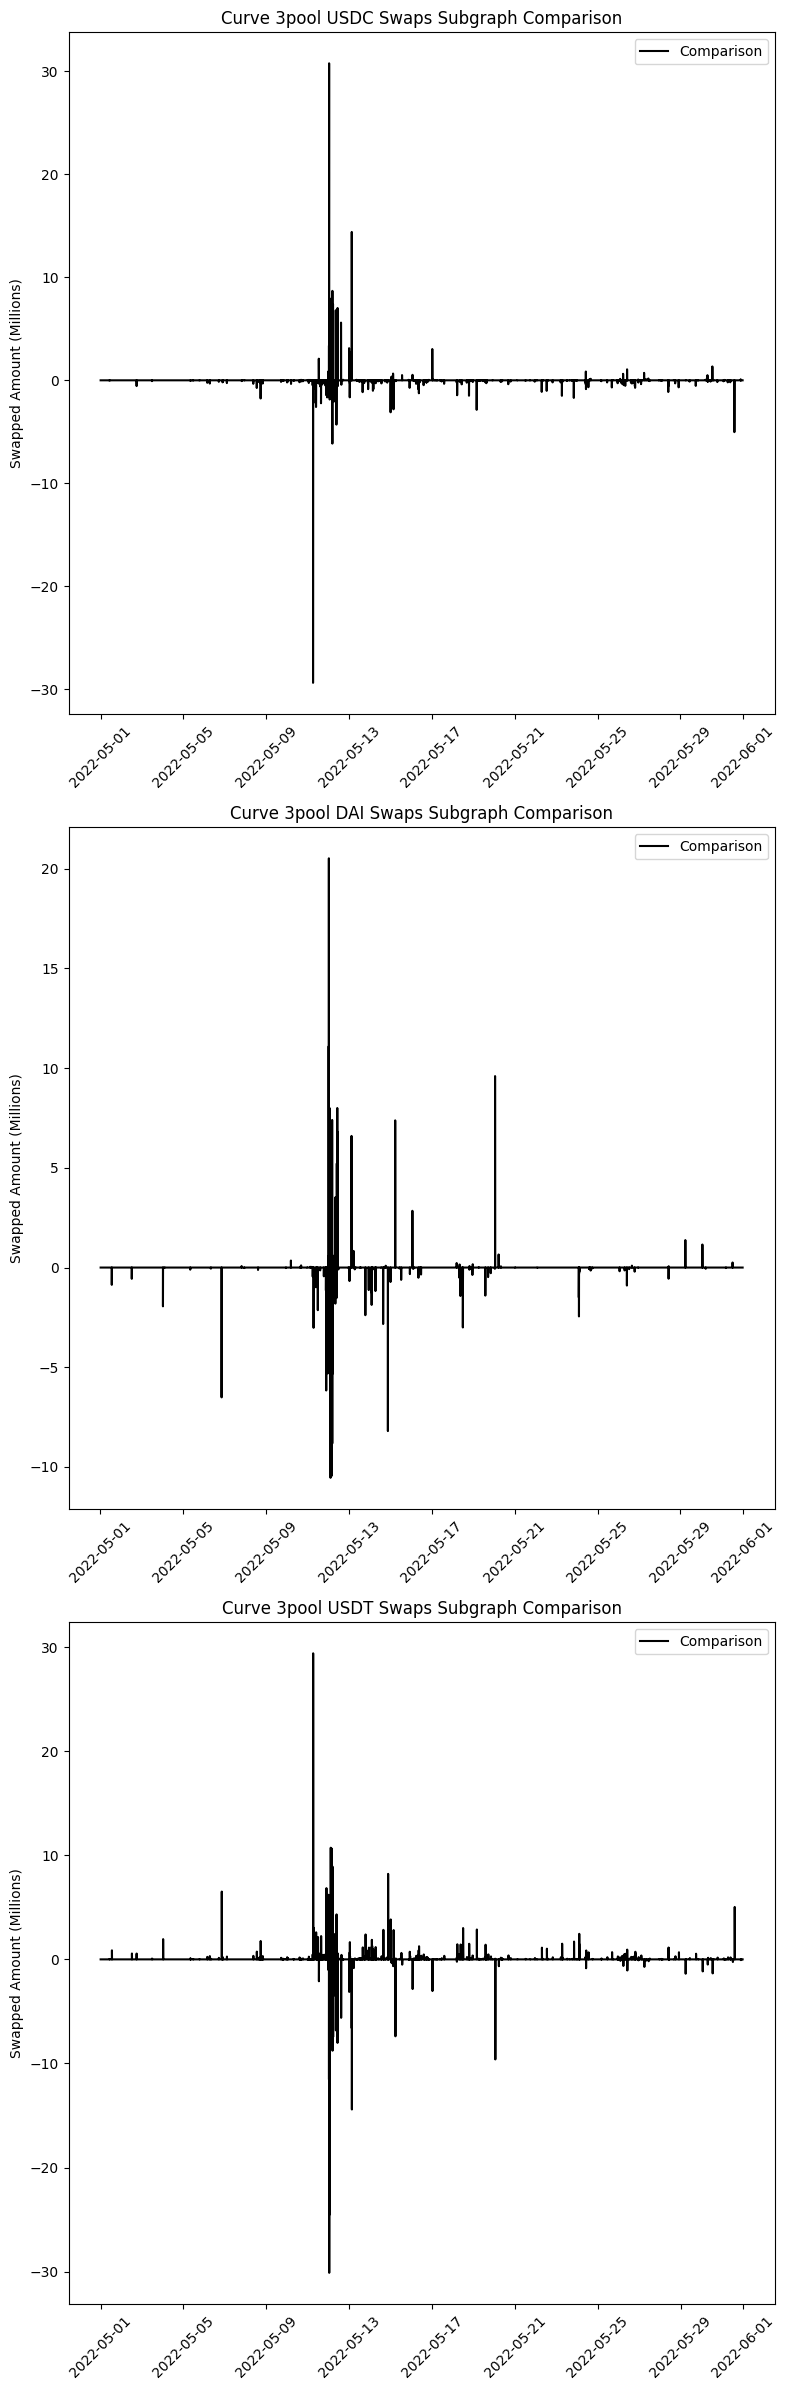

In [150]:
tokens = tokens_messari
freq = '1min'

fig, axs = plt.subplots(len(tokens), 1, figsize=(8, 8*len(tokens)))

for i, token in enumerate(tokens):
    # Cvx
    swap_in = df_swaps_cvx[df_swaps_cvx['tokenIn.symbol']==token]['amountIn'].resample(freq).sum()
    swap_out = -1*df_swaps_cvx[df_swaps_cvx['tokenOut.symbol']==token]['amountOut'].resample(freq).sum()
    flow_cvx = pd.concat([swap_in, swap_out], axis=1).fillna(0)
    flow_cvx['netFlowCvx'] = flow_cvx['amountIn'] + flow_cvx['amountOut']
    flow_cvx = flow_cvx[['netFlowCvx']]

    # Messari
    swap_in = df_swaps_messari[df_swaps_messari['tokenIn.symbol']==token]['amountIn'].resample(freq).sum()
    swap_out = -1*df_swaps_messari[df_swaps_messari['tokenOut.symbol']==token]['amountOut'].resample(freq).sum()
    flow_messari = pd.concat([swap_in, swap_out], axis=1).fillna(0)
    flow_messari['netFlowMessari'] = flow_messari['amountIn'] + flow_messari['amountOut']
    flow_messari = flow_messari[['netFlowMessari']]

    flow = pd.concat([flow_cvx, flow_messari], axis=1).fillna(0)
    flow['comparison'] = flow['netFlowCvx'] - flow['netFlowMessari']

    axs[i].plot(flow.index, flow['comparison']/1e6, label='Comparison', color='black')

    axs[i].set_ylabel('Swapped Amount (Millions)')
    axs[i].set_title(f"Curve {pool_name} {token} Swaps Subgraph Comparison")
    axs[i].tick_params(axis='x', rotation=45)

    axs[i].legend()

fig.tight_layout()

### Observations

- UST wormhole pool is weird, the 3CRV LP token is included in swap data for both cvx and messari?
- Amount in and out is too different for 3pool, that can't be right. What is going on in mid-May 2022? 
    - Probs because Messari is missing some swaps (given the count above). Are there patterns in missing swaps?
    - 65 swaps have duplicated tx hashes on convex, none on messari. Why?

In [151]:
sample_messari = df_swaps_messari[df_swaps_messari.index > '2022-05-09']
sample_messari = sample_messari[sample_messari.index < '2022-05-15']

sample_cvx = df_swaps_cvx[df_swaps_cvx.index > '2022-05-10']
sample_cvx = sample_cvx[sample_cvx.index < '2022-05-15']

In [152]:
sample_messari.head()

,tokenIn.symbol,amountIn,amountInUSD,tokenOut.symbol,amountOut,amountOutUSD,from,hash
timestamp,,,,,,,,
2022-05-09 00:05:00,USDT,4002.56944,4002.56944,DAI,4000.97293,4000.97293,0x12e599006a5f19819cde6fabcebbd8586688c8ac,0x5d458545bfcdcf506113a2517fe71c301d2dad2e92ba...
2022-05-09 01:17:21,DAI,20000.00000,20000.00000,USDC,19993.74188,19993.74188,0x2789fd4408630121bbc3728ce351193423d5fa8c,0x10512bc0421b2bd2e4b06e4ad0e3496292857cf3042a...
2022-05-09 01:26:36,USDC,1000000.00000,1000000.00000,USDT,999812.38101,999812.38101,0x455d7eb74860d0937423b9184f9e8461aa354ebb,0x9aacf3b0a45cdbecdf3e6c081ff956d7aaaadd0ce808...
2022-05-09 03:29:37,USDC,4267.95596,4267.95596,USDT,4267.17960,4267.17960,0x80d4230c0a68fc59cb264329d3a717fcaa472a13,0x354956ad8fd94732d988fc8555b71c438f3b5dd0724a...
2022-05-09 03:28:23,USDC,158928.21170,158928.21170,DAI,158883.07351,158883.07351,0x00000000000a47b1298f18cf67de547bbe0d723f,0x76e8fd56c38a57433cf9fe53cedc20803ef3d8062499...


In [153]:
sample_cvx.head()

,tokenIn.symbol,amountIn,amountInUSD,tokenOut.symbol,amountOut,amountOutUSD,from,hash
datetime,,,,,,,,
2022-05-10 00:12:22,USDT,2.056806e+05,None,USDC,2.055159e+05,None,0x45716d9eddbc332df1d42b9f540fbebed671b20f,0xed3f00740d77a7f0f92ea8dfdb2d0719dae3f2f4c742...
2022-05-10 00:21:52,USDT,1.000000e+04,None,DAI,9.993677e+03,None,0x12e599006a5f19819cde6fabcebbd8586688c8ac,0x797c85dc09ca4c0b6ebb1bf7f36917dfcb3274daeb99...
2022-05-10 00:34:46,USDC,2.298352e+05,None,DAI,2.298064e+05,None,0x166a309efceedc82c501014130beadd0b3097475,0x26063dd3fa2fc70db6e5b58f813614ca51f1b31af4d2...
2022-05-10 00:34:46,DAI,1.594774e+06,None,USDT,1.594827e+06,None,0x04b35d8eb17729b2c4a4224d07727e2f71283b73,0xd9d1aa2c4c336d2f3b6c4b376c14da06acd24547b197...
2022-05-10 00:34:46,USDC,1.470294e+05,None,DAI,1.470111e+05,None,0x166a309efceedc82c501014130beadd0b3097475,0xea042a403c054a516ff822b2b60225fe170b82b990e8...


In [154]:
sample_cvx.iloc[0]['hash']

'0xed3f00740d77a7f0f92ea8dfdb2d0719dae3f2f4c74246e22eac19e1bf483a7b'

In [155]:
# NOTE: This swap was clearly lost somehow on Messari: https://etherscan.io/tx/0xed3f00740d77a7f0f92ea8dfdb2d0719dae3f2f4c74246e22eac19e1bf483a7b
# Seems to be an MEV bot doing a bunch of swaps and transfers using Uniswap and Curve of USDC, WETH, USDT, and UST
# Why would Messari's subgraph miss this? Happened on May 10th, 2022
df_swaps_messari[df_swaps_messari['hash'] == '0xed3f00740d77a7f0f92ea8dfdb2d0719dae3f2f4c74246e22eac19e1bf483a7b']

,tokenIn.symbol,amountIn,amountInUSD,tokenOut.symbol,amountOut,amountOutUSD,from,hash
timestamp,,,,,,,,


In [156]:
df_swaps_cvx_trimmed = df_swaps_cvx[~df_swaps_cvx['hash'].isin(missing_in_messari)]
df_swaps_cvx_trimmed.shape

(6365, 8)

In [157]:
df_swaps_messari.shape

(6300, 8)

In [158]:
duplicates = df_swaps_cvx_trimmed[df_swaps_cvx_trimmed['hash'].duplicated()]
print(duplicates['hash'][0])
duplicates.head()

0xc64eb8606d7b474635ee64bf1289c7d86547b9d451c782ee6bb727790d4ed265


,tokenIn.symbol,amountIn,amountInUSD,tokenOut.symbol,amountOut,amountOutUSD,from,hash
datetime,,,,,,,,
2022-05-04 02:28:29,DAI,9363.01147,None,USDC,9359.92655,None,0x03e9e6f593b33d8e5362297ccd6955a035cd43a5,0xc64eb8606d7b474635ee64bf1289c7d86547b9d451c7...
2022-05-12 04:35:24,USDT,285000.00000,None,USDC,281757.01271,None,0xd12bcdfb9a39be79da3bdf02557efdcd5ca59e77,0x7a6e3029a5726e11ce757cbd7e8227fe3a3ac7516875...
2022-05-14 03:40:23,DAI,475389.94515,None,USDC,475332.97470,None,0xc118f2eb1291f9bc0c2a4c2d61b59f1785b047b5,0x74ce92086bcf4039cfcb8b09630f4aecd448ab63888d...
2022-05-14 04:23:20,USDC,63132.25000,None,DAI,63129.34904,None,0xd12bcdfb9a39be79da3bdf02557efdcd5ca59e77,0x3f7f92af22629a639f2076cdd695bde144984bfde623...
2022-05-15 10:07:49,USDC,658.02000,None,DAI,657.98642,None,0xd12bcdfb9a39be79da3bdf02557efdcd5ca59e77,0xcc2bfd2870e2f61d7085b30fddbffcd772100c9bb3fd...


In [159]:
# TODO: Make sure that the duplicate isn't an issue with my code
# if the subgraph actually has duplicates, that's great, flag to Benny. We found something useful :)
df_swaps_cvx[df_swaps_cvx['hash'] == '0xc64eb8606d7b474635ee64bf1289c7d86547b9d451c782ee6bb727790d4ed265']

,tokenIn.symbol,amountIn,amountInUSD,tokenOut.symbol,amountOut,amountOutUSD,from,hash
datetime,,,,,,,,
2022-05-04 02:28:29,DAI,9363.01147,None,USDT,9359.50005,None,0x03e9e6f593b33d8e5362297ccd6955a035cd43a5,0xc64eb8606d7b474635ee64bf1289c7d86547b9d451c7...
2022-05-04 02:28:29,DAI,9363.01147,None,USDC,9359.92655,None,0x03e9e6f593b33d8e5362297ccd6955a035cd43a5,0xc64eb8606d7b474635ee64bf1289c7d86547b9d451c7...


In [160]:
df_swaps_messari[df_swaps_messari['hash'] == '0xc64eb8606d7b474635ee64bf1289c7d86547b9d451c782ee6bb727790d4ed265']

,tokenIn.symbol,amountIn,amountInUSD,tokenOut.symbol,amountOut,amountOutUSD,from,hash
timestamp,,,,,,,,
2022-05-04 02:28:29,DAI,9363.01147,9363.01147,USDC,9359.92655,9359.92655,0x03e9e6f593b33d8e5362297ccd6955a035cd43a5,0xc64eb8606d7b474635ee64bf1289c7d86547b9d451c7...


# LP Events

In [167]:
df_lp_messari = datafetcher.get_lp_data(pool_name, source='messari')
df_lp_cvx = datafetcher.get_lp_data(pool_name, source='cvx')

3pool
